# Detection on Adolescent Dataset

In [1]:
import sys
import pandas as pd
import sklearn
import keras
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
asd_data = pd.read_csv(r"C:\Users\HARSHIT\Desktop\mini-project\Autism-Adolescent-Data Plus Description\csv_result-Autism-Adolescent-Data.csv", na_values=['?'])

In [3]:
asd_data.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,0,0,1,1,1,1,1,1,...,m,Hispanic,yes,yes,Austria,no,6,12-16 years,Parent,NO
1,2,0,0,0,0,0,0,0,0,1,...,m,Black,no,no,Austria,no,2,12-16 years,Relative,NO
2,3,0,0,0,0,0,0,0,0,1,...,f,NaN,no,no,AmericanSamoa,no,2,12-16 years,NaN,NO
3,4,0,1,1,1,1,1,0,1,1,...,f,White-European,no,no,United Kingdom,no,7,12-16 years,Self,YES
4,5,1,1,1,1,1,1,1,0,0,...,f,NaN,no,no,Albania,no,7,12-16 years,NaN,YES


In [4]:
asd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               104 non-null    int64 
 1   A1_Score         104 non-null    int64 
 2   A2_Score         104 non-null    int64 
 3   A3_Score         104 non-null    int64 
 4   A4_Score         104 non-null    int64 
 5   A5_Score         104 non-null    int64 
 6   A6_Score         104 non-null    int64 
 7   A7_Score         104 non-null    int64 
 8   A8_Score         104 non-null    int64 
 9   A9_Score         104 non-null    int64 
 10  A10_Score        104 non-null    int64 
 11  age              104 non-null    int64 
 12  gender           104 non-null    object
 13  ethnicity        98 non-null     object
 14  jundice          104 non-null    object
 15  austim           104 non-null    object
 16  contry_of_res    104 non-null    object
 17  used_app_before  104 non-null    ob

In [5]:
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.00000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,0.730769,0.538462,0.653846,0.701923,0.75000,0.769231,0.519231,0.615385,0.788462,0.653846,14.134615,6.721154
std,30.166206,0.445708,0.500933,0.478047,0.459629,0.43511,0.423365,0.502050,0.488860,0.410377,0.478047,1.576882,2.200868
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000
25%,26.750000,0.000000,0.000000,0.000000,0.000000,0.75000,1.000000,0.000000,0.000000,1.000000,0.000000,13.000000,6.000000
50%,52.500000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,7.000000
75%,78.250000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,8.000000
max,104.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,10.000000


# Feature Exploration

In [6]:
records = len(asd_data.index)

yes = len(asd_data[asd_data['Class/ASD'] == 'YES'])

no = len(asd_data[asd_data['Class/ASD'] == 'NO'])

yes_percent = float(yes) / records *100

print("Total number of records: {}".format(records))
print("Patients diagnoised with disorder: {}".format(yes))
print("Patients not diagnoised with disorder: {}".format(no))
print("Percentage of patients diagnoised with disorder: {:.2f}%".format(yes_percent))

Total number of records: 104
Patients diagnoised with disorder: 63
Patients not diagnoised with disorder: 41
Percentage of patients diagnoised with disorder: 60.58%


In [7]:
# .isnull() will replace the null values with boolean value True and otherwise with False.
# Pandas DataFrame.loc attribute access a group of rows and columns by label(s) or a boolean array in the given DataFrame.
asd_data.loc[
             (asd_data['age'].isnull()) |
             (asd_data['gender'].isnull()) |
             (asd_data['ethnicity'].isnull()) |
             (asd_data['jundice'].isnull())|
             (asd_data['austim'].isnull()) |
             (asd_data['contry_of_res'].isnull())|
             (asd_data['used_app_before'].isnull())|
             (asd_data['result'].isnull())|
             (asd_data['age_desc'].isnull())|
             (asd_data['relation'].isnull())
            ]

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
2,3,0,0,0,0,0,0,0,0,1,...,f,NaN,no,no,AmericanSamoa,no,2,12-16 years,NaN,NO
4,5,1,1,1,1,1,1,1,0,0,...,f,NaN,no,no,Albania,no,7,12-16 years,NaN,YES
5,6,1,0,0,0,0,1,0,0,1,...,f,NaN,no,no,Belgium,no,3,12-16 years,NaN,NO
6,7,0,0,0,1,1,1,1,1,1,...,f,NaN,no,no,Afghanistan,no,6,12-16 years,NaN,NO
28,29,1,1,0,0,0,0,1,0,1,...,m,NaN,no,no,Afghanistan,no,4,12-16 years,NaN,NO
97,98,1,0,0,0,1,0,0,1,0,...,f,NaN,no,no,Argentina,no,4,12-15 years,NaN,NO


In [8]:
asd_data.dropna(inplace = True) #As the missing data is random, dropna will drop the rows with missing data
asd_data.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,54.204082,0.734694,0.551020,0.683673,0.724490,0.765306,0.785714,0.520408,0.632653,0.795918,0.673469,14.132653,6.867347
std,29.054502,0.443766,0.499947,0.467433,0.449068,0.425986,0.412436,0.502152,0.484561,0.405101,0.471355,1.577142,2.142538
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000
25%,30.250000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,13.000000,6.000000
50%,54.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,7.000000
75%,78.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,8.000000
max,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,10.000000


# Visualization

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

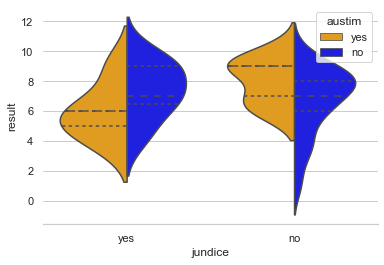

In [10]:
sns.violinplot(x="jundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "orange", 'no': "blue"})
sns.despine(left=True)

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


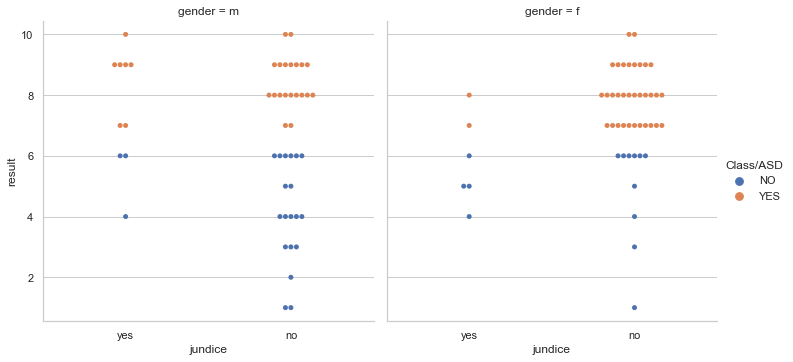

In [11]:
sns.factorplot(x="jundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="swarm");

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


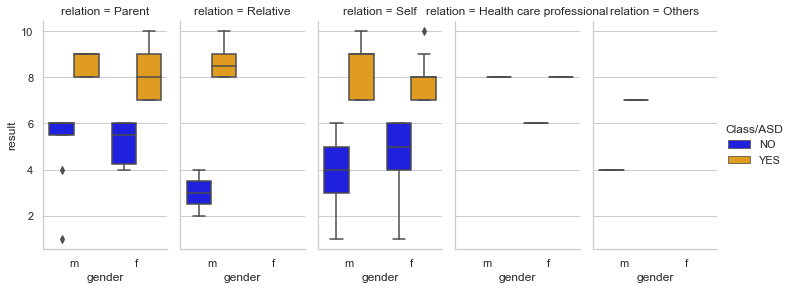

In [12]:
sns.factorplot(x="gender", y="result", hue="Class/ASD",
               col="relation", data=asd_data, kind="box", size=4, aspect=.5, palette={'YES': "orange", 'NO': "blue"});

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


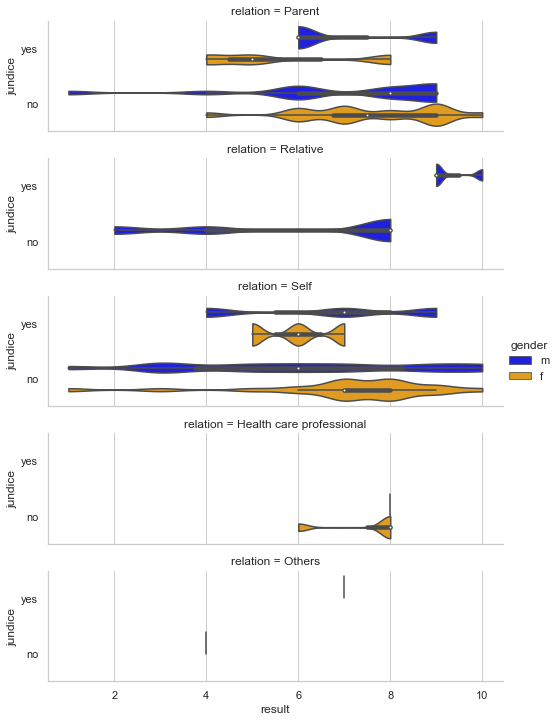

In [13]:
g = sns.factorplot(x="result", y="jundice",
                   hue="gender", row="relation",
                   data=asd_data,
                    orient="h", size=2, aspect=3.5, palette={'f': "orange", 'm': "blue"},
                  kind="violin", dodge=True, cut=0, bw=.2)

# Pre-Processing

In [9]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 
                         'contry_of_res', 'result', 'relation',
                         'A1_Score','A2_Score','A3_Score','A4_Score','A5_Score',
                         'A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']]

In [10]:
# Some of our models require the input data to be normalized, 
# so I proceed to normalize the attribute data. Here, I use preprocessing.MinMaxScaler().

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.75,m,Hispanic,yes,yes,Austria,0.555556,Parent,0,0,0,1,1,1,1,1,1,0
1,0.75,m,Black,no,no,Austria,0.111111,Relative,0,0,0,0,0,0,0,0,1,1
3,0.50,f,White-European,no,no,United Kingdom,0.666667,Self,0,1,1,1,1,1,0,1,1,0
7,0.75,f,Middle Eastern,no,no,Australia,0.666667,Parent,1,1,0,1,1,0,1,1,0,1
8,0.00,m,Black,yes,yes,Bahrain,0.555556,Parent,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.00,f,Middle Eastern,no,no,Anguilla,0.555556,Parent,0,1,1,1,0,1,1,0,1,0
100,1.00,m,Asian,no,no,India,0.333333,Parent,1,0,1,0,0,0,0,1,0,1
101,0.00,f,White-European,no,no,United Kingdom,0.777778,Self,1,0,0,1,1,1,1,1,1,1
102,0.25,f,White-European,no,no,United Kingdom,0.555556,Self,1,1,0,1,1,0,0,0,1,1


In [11]:
# One-Hot encoding

features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_South Africa,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.75,0.555556,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,0.75,0.111111,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.50,0.666667,0,1,1,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
7,0.75,0.666667,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
8,0.00,0.555556,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

63 total features after one-hot encoding.


Text(0, 0.5, 'Frequency')

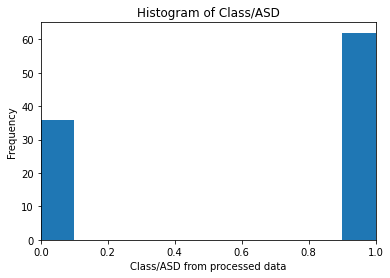

In [13]:
#visualization of classes asd_data dataset

import matplotlib.pyplot as plt

plt.hist(asd_classes, bins=10)

plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

# Shuffle and split data 

In [14]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)

In [15]:
print("Number of samples in Training set : ", X_train.shape[0])
print("Number of samples in testing set : ", X_test.shape[0])

Number of samples in Training set :  78
Number of samples in testing set :  20


# Machine Learning Techniques

## Logistic Regresion 

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_class = lr.predict(X_test)
lr.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1],
      dtype=int64)

[[ 6  1]
 [ 1 12]]


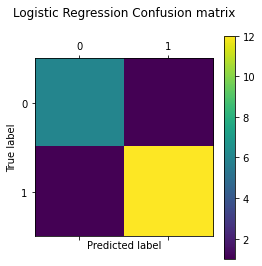

In [17]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


plt.matshow(confusion)
plt.title('Logistic Regression Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 0.9
Classification Error : 0.1
Senstivity : 0.9230769230769231
Specificity : 0.8571428571428571
False Positive Rate : 0.14285714285714285
Precision : 0.9230769230769231


In [19]:
#F1 score
from sklearn.metrics import f1_score
predictions_test = lr.predict(X_test)
f1_score(y_test,predictions_test)

0.9230769230769231

In [20]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = lr.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9230769230769231

# Decision Tree

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [22]:
dtc.predict(X_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1],
      dtype=int64)

[[ 6  1]
 [ 1 12]]


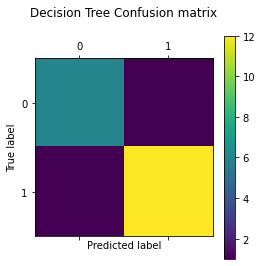

In [23]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

plt.matshow(confusion)
plt.title('Decision Tree Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [24]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 0.9
Classification Error : 0.1
Senstivity : 0.9230769230769231
Specificity : 0.8571428571428571
False Positive Rate : 0.14285714285714285
Precision : 0.9230769230769231


In [25]:
#F1 score
from sklearn.metrics import f1_score
predictions_test = dtc.predict(X_test)
f1_score(y_test,predictions_test)

1.0

In [26]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = dtc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

## K- Nearest Neighbor 

In [27]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train.values, y_train.values)
y_pred_class = knn.predict(X_test.values)
knn.predict(X_test.values)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

[[ 2  5]
 [ 0 13]]


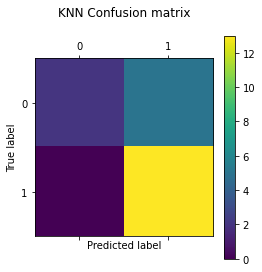

In [28]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


plt.matshow(confusion)
plt.title('KNN Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 0.75
Classification Error : 0.25
Senstivity : 1.0
Specificity : 0.2857142857142857
False Positive Rate : 0.7142857142857143
Precision : 0.7222222222222222


In [33]:
#cross validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, features_final.values, asd_classes.values, cv=10)

cv_scores.mean()

0.8055555555555556

In [30]:
#F1 score
from sklearn.metrics import f1_score
predictions_test = knn.predict(X_test.values)
f1_score(y_test,predictions_test)

0.8387096774193548

In [31]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test.values)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.7647058823529411

In [34]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = []
cvscores = []
for n in range(10, 50):
    knn = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final.values, asd_classes.values, cv=10)
    neighbors.append(n)
    cvscores.append(cv_scores.mean())

#print(arr)   

print(neighbors[cvscores.index(max(cvscores))])

10


## Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)
mnb.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

[[ 2  5]
 [ 0 13]]


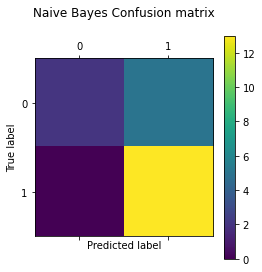

In [36]:
#confusion matrix

from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


plt.matshow(confusion)
plt.title('Naive Bayes Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [37]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 0.75
Classification Error : 0.25
Senstivity : 1.0
Specificity : 0.2857142857142857
False Positive Rate : 0.7142857142857143
Precision : 0.7222222222222222


In [39]:
#F1 score
from sklearn.metrics import f1_score
predictions_test = mnb.predict(X_test)
f1_score(y_test,predictions_test)

0.8387096774193548

In [40]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = mnb.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.7647058823529411

# Sequential Model (CNN)

In [41]:
# Imports
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


np.random.seed(42)

In [42]:
# Building the model architecture with one layer of length 4


model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 63))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 512       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [44]:
# Running and evaluating the model
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_test, y_test), 
          verbose=2)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp4vk0r_xj.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmp4vk0r_xj.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 - 28s - loss: 0.7046 - accuracy: 0.4103 - val_loss: 0.6956 - val_accuracy: 0.4000
Epoch 2/100
5/5 - 0s - loss: 0.7031 - accuracy: 0.4231 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/100
5/5 - 0s - loss: 0.7014 - accuracy: 0.3846 - val_loss: 0.6920 - val_accuracy: 0.6000
Epoch 4/100
5/5 - 0s - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.6000
Epoch 5

Epoch 76/100
5/5 - 0s - loss: 0.5424 - accuracy: 0.8974 - val_loss: 0.6384 - val_accuracy: 0.7000
Epoch 77/100
5/5 - 0s - loss: 0.5472 - accuracy: 0.9103 - val_loss: 0.6378 - val_accuracy: 0.7000
Epoch 78/100
5/5 - 0s - loss: 0.5528 - accuracy: 0.8974 - val_loss: 0.6363 - val_accuracy: 0.7000
Epoch 79/100
5/5 - 0s - loss: 0.5433 - accuracy: 0.9359 - val_loss: 0.6352 - val_accuracy: 0.7000
Epoch 80/100
5/5 - 0s - loss: 0.5456 - accuracy: 0.9103 - val_loss: 0.6360 - val_accuracy: 0.7000
Epoch 81/100
5/5 - 0s - loss: 0.5364 - accuracy: 0.9103 - val_loss: 0.6349 - val_accuracy: 0.7000
Epoch 82/100
5/5 - 0s - loss: 0.5336 - accuracy: 0.9231 - val_loss: 0.6344 - val_accuracy: 0.7000
Epoch 83/100
5/5 - 0s - loss: 0.5302 - accuracy: 0.9103 - val_loss: 0.6328 - val_accuracy: 0.7000
Epoch 84/100
5/5 - 0s - loss: 0.5337 - accuracy: 0.8974 - val_loss: 0.6316 - val_accuracy: 0.7000
Epoch 85/100
5/5 - 0s - loss: 0.5468 - accuracy: 0.8846 - val_loss: 0.6307 - val_accuracy: 0.7000
Epoch 86/100
5/5 - 0

Text(0.5, 1.0, 'Loss')

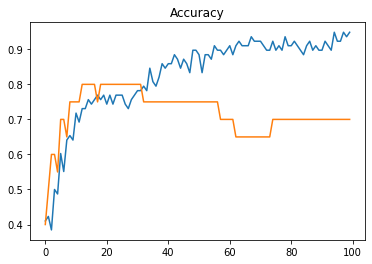

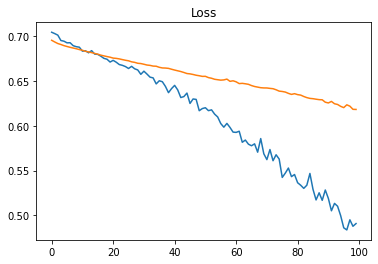

In [45]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(100)

plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title ('Accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs, val_loss)
plt.title('Loss')

In [46]:
#accuracy
model.evaluate(X_test, y_test, verbose=0)[1]

0.699999988079071

In [47]:
predictions = model.predict_classes(X_test)
predictions

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]])

[[5 2]
 [4 9]]


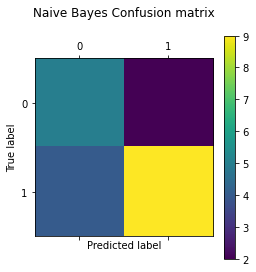

In [49]:
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

plt.matshow(confusion)
plt.title('Naive Bayes Confusion matrix',y=1.20)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [50]:
print("Classification Accuracy :", (TP + TN) / float(TP + TN + FP + FN))
print("Classification Error :", (FP + FN) / float(TP + TN + FP + FN))
print("Senstivity :", TP / float(FN + TP))
print("Specificity :", TN / (TN + FP))
print("False Positive Rate :", FP / float(TN + FP))
print("Precision :", TP / float(TP + FP))

Classification Accuracy : 0.7
Classification Error : 0.3
Senstivity : 0.6923076923076923
Specificity : 0.7142857142857143
False Positive Rate : 0.2857142857142857
Precision : 0.8181818181818182


In [51]:
#F1 score
from sklearn.metrics import f1_score
predictions_test = predictions
f1_score(y_test,predictions_test)

0.7500000000000001

In [52]:
#F- beta score

from sklearn.metrics import fbeta_score
predictions_test = predictions
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.7894736842105262